See 'components of polarizability' for computation details 

In [1]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex=True)

from __future__ import division
import sympy as sym
from sympy import *

%matplotlib inline
from matplotlib import rc
rc('font',**{'family':'serif','size'   : 12})

In [2]:
from sympy import S
from sympy.physics.wigner import racah
from sympy.physics.wigner import wigner_3j
from sympy.physics.wigner import wigner_6j

# Several constants

In [3]:
from __future__ import division, print_function, unicode_literals

# Basic constants
pi = 3.1415926
c = 299792458
h = 6.62606957e-34
hbar = h / 2 / pi
k_B = 1.3806488e-23
m_e = 9.10938291e-31
m_p = 1.672621898e-27
mu_0 = 4e-7 * pi
epsilon_0 = 1 / c**2 / mu_0
E = 1.602176565e-19
N_A = 6.02214129e+23
a_0 = 5.2917721067E-11


# Mass of Sr-88, Sr-87, Sr-86, Sr-84
M88 = 1.459706905272492E-25  
M87 = 1.4431557366419E-25  
M86 = 1.42655671117996E-25
M84 = 1.3934150821E-25
M = M88

# Polarizability of 3P1

In [9]:
# Transition frequency in units of 10^15 Hz
# omega = 2 * pi * f
# Transition rates in units of 10^6 s^-1
# Transition wavelengths in units of nm

# f = open ( '3P1' , 'r')
# The zeros in this file is not true
f = open ( '3P1_Cooper' , 'r')
l = []
l = [line.split() for line in f]
initial_state_3P1 = []
final_state_3P1 = []
wavelength_3P1 = []
rate_3P1 = []
for line in l[0:20]:
    #print(line)
    initial_state_3P1.append(line[3])
    final_state_3P1.append(line[5])
    wavelength_3P1.append(float(line[9]))
    rate_3P1.append(float(line[10]))
print(initial_state_3P1)
print(final_state_3P1)
print(wavelength_3P1)
print(rate_3P1)

['3P10', '3P10', '3P', '3P', '3P', '3P', '3P10', '3P10', '3P', '3P', '3P10', '3P10', '3P', '3P', '3P', '3P', '3P', '3P', '3P', '3P']
['3S1', '3S1', '3S1', '3S1', '3S1', '3P0', '3P1', '3P2', '3D1', '3D2', '3D1', '3D2', '3D1', '3D2', '3D1', '3D2', '3D1', '3D2', '3D1', '3D2']
[687.8313, 436.171, 380.7424, 357.7243, 345.7426, 483.3459, 478.432, 472.2278, 2736.199, 2692.193, 487.6075, 487.2493, 397.0043, 396.9261, 365.3928, 365.327, 350.1113, 350.067, 341.2568, 341.2568]
[27.1, 9.7, 2.803, 1.5426, 0.9425, 117.2594, 30.2, 35.9, 0.1336, 0.2524, 26.3, 48.4, 11.3786, 20.4936, 6.0427, 10.8832, 3.6189, 6.5165, 2.3424, 4.2164]


In [10]:
# Omega in units of 2 * pi * 10^15 Hz
# Wavelength in units of nm
def Wavelength(omega):
    return 2 * pi * c * 1E-6 / omega

def Omega(wavelength):
    return 2 * pi * c * 1E-6 / wavelength

def Compute_SLJ(a):
    S = 0.5 * (float(a[0]) - 1)
    J = float(a[2])
    if (a[1] == 'S'):
        L = 0
    if (a[1] == 'P'):
        L = 1
    if (a[1] == 'D'):
        L = 2
    return(S, L, J)

In [11]:
omega_3P1 = []
SLJ_3P1 = []
S1L1J1_3P1 = []
for i, k in enumerate(wavelength_3P1):
    omega_3P1.append(Omega(k))
    SLJ_3P1.append(Compute_SLJ('3P1'))
    S1L1J1_3P1.append(Compute_SLJ(final_state_3P1[i]))
print(omega_3P1)
print(SLJ_3P1)
print(S1L1J1_3P1)

[2.738537102305785, 4.3186079202359196, 4.947312238345983, 5.265651607053871, 5.448132614196866, 3.8971087479530113, 3.937135340397844, 3.98886201781687, 0.6884190569389219, 0.6996718047989952, 3.8630487332069774, 3.8658886429949133, 4.744662803846762, 4.745597568860353, 5.155141357950187, 5.156069863922517, 5.3801506411738815, 5.380831484193658, 5.519747987958691, 5.519747987958691]
[(1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0), (1.0, 1, 1.0)]
[(1.0, 0, 1.0), (1.0, 0, 1.0), (1.0, 0, 1.0), (1.0, 0, 1.0), (1.0, 0, 1.0), (1.0, 1, 0.0), (1.0, 1, 1.0), (1.0, 1, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0), (1.0, 2, 1.0), (1.0, 2, 2.0)]


In [12]:
from math import sqrt
def Alpha_3P1(omega):
    scalar = 0
    vector = 0
    tensor = 0
    J = SLJ_3P1[0][2]
    for i, omega_ik in enumerate(omega_3P1):
        result = (2 * S1L1J1_3P1[i][2] + 1) / (2 * J + 1) * rate_3P1[i] * 1E-54 / ((omega_ik)**2 * ((omega_ik)**2 - (omega)**2))
        # result = result * 3 * pi * epsilon_0 * c**3   # SI units
        result = result * 3 / 4 * (c / a_0)**3    # Atomic units
        scalar = scalar + result * 2 / 3
        vector = vector + result * (-1)**(S1L1J1_3P1[i][2] + J + 1) * sqrt((6 * J * (2 * J + 1)) / (J + 1)) * wigner_6j(1, 1, 1, J, J, S1L1J1_3P1[i][2])
        tensor = tensor + result * (-1)**(S1L1J1_3P1[i][2] + J) * sqrt((40 * J * (2 * J + 1) * (2 * J - 1)) / (3 * (J + 1) * (2 * J + 3))) * wigner_6j(1, 1, 2, J, J, S1L1J1_3P1[i][2])
    return (scalar, vector, tensor)

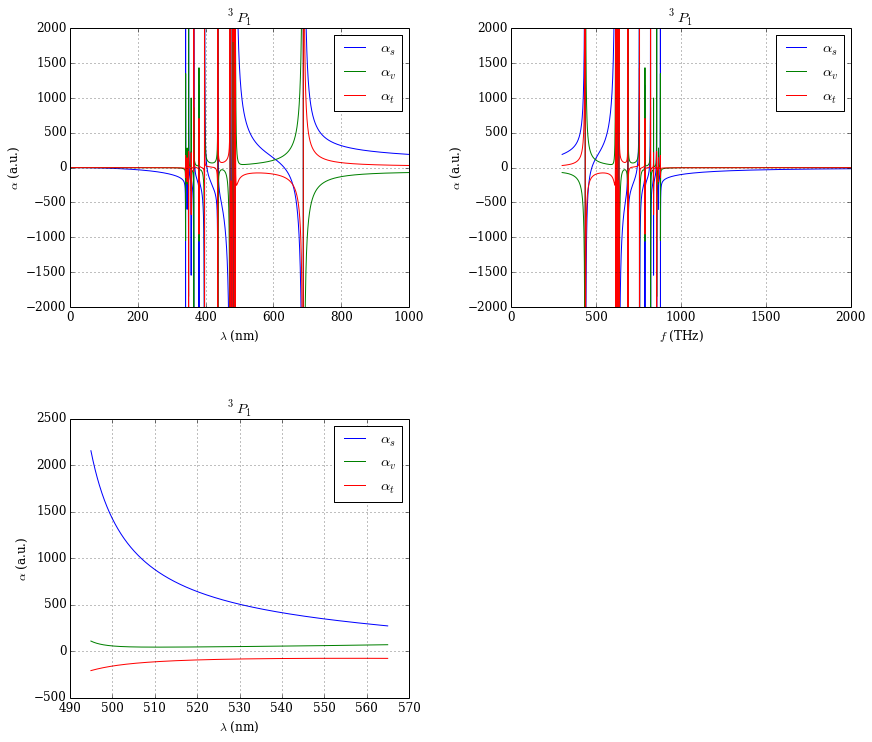

In [13]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange

figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(1, 1000, 0.1)
for _wavelength in wavelength:
    alpha = Alpha_3P1(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax1.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax1.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
ax1.set_ylim([-2000,2000])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('$^3P_1$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_s, markersize = 10, label = r'$\alpha_s$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_v, markersize = 10, label = r'$\alpha_v$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_t, markersize = 10, label = r'$\alpha_t$')
ax2.set_xlim([0,2000])
ax2.set_ylim([-2000,2000])
ax2.set_xlabel("$f$ (THz)")
ax2.set_ylabel(r"$\alpha$ (a.u.)")
ax2.legend(loc = 1)
ax2.set_title('$^3P_1$')
ax2.grid(1)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha = Alpha_3P1(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])

ax3 = plt.subplot(gs[1,0]) 
ax3.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax3.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax3.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
#ax3.set_xlim([500,535])
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel(r"$\alpha$ (a.u.)")
ax3.legend(loc = 1)
ax3.set_title('$^3P_1$')
ax3.grid(1)
#plt.savefig('3P1 polarizability.svg')

# Polarizability of 1S0

In [51]:
# Transition frequency in units of 10^15 Hz
# omega = 2 * pi * f
# Transition rates in units of 10^6 s^-1
# Transition wavelengths in units of nm

f = open ( '1S0' , 'r')
l = []
l = [line.split() for line in f]
initial_state_1S0 = []
final_state_1S0 = []
wavelength_1S0 = []
rate_1S0 = []
for line in l[0:42]:
    #print(line)
    initial_state_1S0.append(line[3])
    final_state_1S0.append(line[5])
    wavelength_1S0.append(float(line[8]))
    rate_1S0.append(float(line[9]))
print(initial_state_1S0)
print(final_state_1S0)
print(wavelength_1S0)
print(rate_1S0)

['1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0', '1S0']
['3P1', '1P1', '1P1', '3P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1', '1P1']
[689.3, 460.8618, 293.183, 268.0, 256.947, 242.81, 235.431, 230.727, 227.522, 225.395, 223.835, 222.7, 221.851, 221.2, 220.693, 220.286, 219.958, 219.69, 219.466, 219.279, 219.12, 218.984, 218.867, 218.765, 218.678, 218.6046, 218.5389, 218.4681, 218.4138, 218.3644, 218.3212, 218.281, 218.2455, 218.213, 218.1834, 218.1561, 218.1314, 218.1084, 218.0874, 218.0681, 218.0496, 218.0337]
[0.0469, 190.0057, 1.87, 0

In [52]:
omega_1S0 = []
SLJ_1S0 = []
S1L1J1_1S0 = []
for i, k in enumerate(wavelength_1S0):
    omega_1S0.append(Omega(k))
    SLJ_1S0.append(Compute_SLJ('1S0'))
    S1L1J1_1S0.append(Compute_SLJ(final_state_1S0[i]))
print(omega_1S0)
print(SLJ_1S0)
print(S1L1J1_1S0)

[2.7327020675717706, 4.087237291477014, 6.424832050893883, 7.028550504392617, 7.330895224218307, 7.75771811365768, 8.000864521567769, 8.163983994839015, 8.278986362537344, 8.357113224238432, 8.415357451592563, 8.458246677939925, 8.490615481459274, 8.515603685249644, 8.535166657652129, 8.550936215543526, 8.563687318384517, 8.574134167131964, 8.582885436364728, 8.590204876788116, 8.596438185365194, 8.601777002782036, 8.606375265239718, 8.61038801991736, 8.6138136217508, 8.61670584780568, 8.619296313732802, 8.622089610232438, 8.624233153661633, 8.626184191091687, 8.627891085140707, 8.629480051755404, 8.630883730373462, 8.63216918871571, 8.63334027784525, 8.634420651896606, 8.635398366201388, 8.636308987536571, 8.63714059215352, 8.637905017640001, 8.638637884120042, 8.639267852525647]
[(0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0), (0.0, 0, 0.0

In [53]:
from math import sqrt
def Alpha_1S0(omega):
    scalar = 0
    vector = 0
    tensor = 0
    J = SLJ_1S0[0][2]
    for i, omega_ik in enumerate(omega_1S0):
        if (omega_ik == omega):
            result = 0
        else:
            result = (2 * S1L1J1_1S0[i][2] + 1) / (2 * J + 1) * rate_1S0[i] * 1E-54 / ((omega_ik)**2 * ((omega_ik)**2 - (omega)**2))
        # result = result * 3 * pi * epsilon_0 * c**3   # SI units
        result = result * 3 / 4 * (c / a_0)**3    # Atomic units
        scalar = scalar + result * 2 / 3
        vector = vector + result * (-1)**(S1L1J1_1S0[i][2] + J + 1) * sqrt((6 * J * (2 * J + 1)) / (J + 1)) * wigner_6j(1, 1, 1, J, J, S1L1J1_1S0[i][2])
        tensor = tensor + result * (-1)**(S1L1J1_1S0[i][2] + J) * sqrt((40 * J * (2 * J + 1) * (2 * J - 1)) / (3 * (J + 1) * (2 * J + 3))) * wigner_6j(1, 1, 2, J, J, S1L1J1_1S0[i][2])
    return (scalar, vector, tensor)

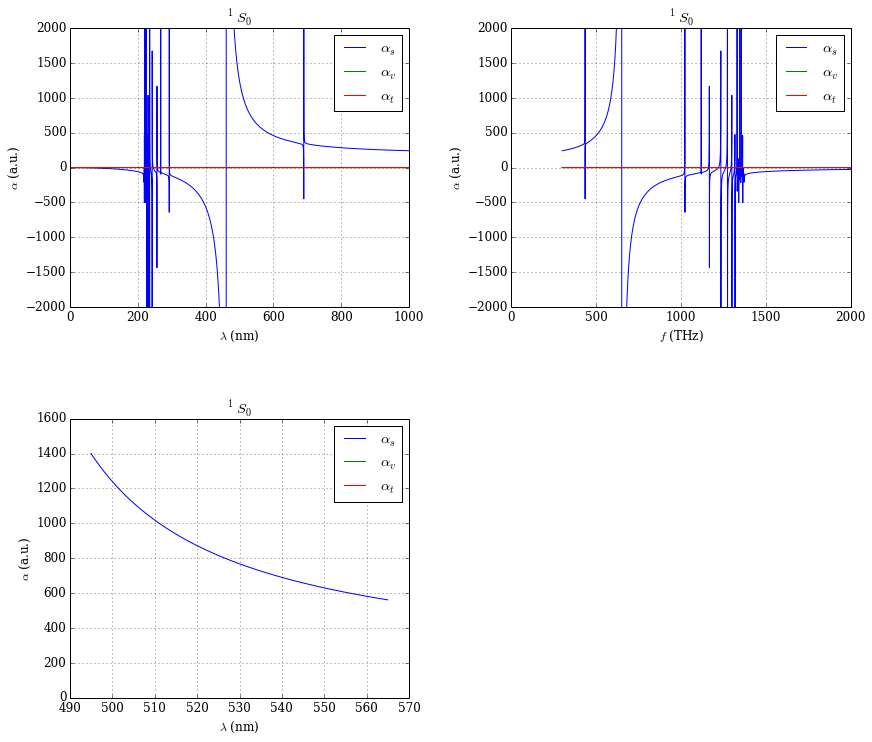

In [17]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange

figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(1, 1000, 0.1)
for _wavelength in wavelength:
    alpha = Alpha_1S0(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax1.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax1.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
ax1.set_ylim([-2000,2000])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('$^1S_0$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_s, markersize = 10, label = r'$\alpha_s$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_v, markersize = 10, label = r'$\alpha_v$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_t, markersize = 10, label = r'$\alpha_t$')
ax2.set_xlim([0,2000])
ax2.set_ylim([-2000,2000])
ax2.set_xlabel("$f$ (THz)")
ax2.set_ylabel(r"$\alpha$ (a.u.)")
ax2.legend(loc = 1)
ax2.set_title('$^1S_0$')
ax2.grid(1)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha = Alpha_1S0(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])

ax3 = plt.subplot(gs[1,0]) 
ax3.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax3.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax3.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
#ax3.set_xlim([500,535])
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel(r"$\alpha$ (a.u.)")
ax3.legend(loc = 1)
ax3.set_title('$^1S_0$')
ax3.grid(1)
#plt.savefig('1S0 polarizability.svg')

# Computation of magic wavelength

The total light shift is given by

$\Delta E(J, m_J, \omega) = -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{m_J}{J} - \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} \frac{3 m_J^2 - J(J+1)}{J(2J-1)}$

$\textbf{Normalization.}$ Note $(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z = \mid \textbf{E}_{0, -1}^{(+)}\mid^2 - \mid \textbf{E}_{0, 1}^{(-)}\mid^2$. Then $\sigma^{+} (\textbf{E}_0^{(+)} = E^{(+)}_{0, -1})$ has light shift

$\Delta E_{J, \pm{J}} ^{(1)} = \mp \alpha^{(1)}(J) \mid E_{0, -1}^{(+)}\mid^2$

For a linearly polarized light, the vector light shift is zero. Define the angle between the E-field and the quantization axis(defined by the B-field) as $\theta$, the total light shift is then

$\Delta E(J, m_J, \omega) = -(\alpha^{(0)}(J, \omega) -  \alpha^{(2)}(J, \omega)\frac{1-3cos^2\theta}{2} \frac{3 m_J^2 - J(J+1)}{J(2J-1)}) \mid E_0^{(+)} \mid^2 $

For $^3P_1$, this is

$\Delta E(J = 1, m_J, \omega) = -(\alpha^{(0)}(J, \omega) -  \alpha^{(2)}(J, \omega)\frac{1-3cos^2\theta}{2} (3 m_J^2 - 2) \mid E_0^{(+)} \mid^2 $ (Yamamoto 2016)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:38: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:40: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:42: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[ 515.1] 942.543258386
[ 515.1] 739.595588319 44.4213982605135 -101.917990775284
[ 500.4] 1235.33713645
[ 500.4] 1235.33713645
[ 505.9] 1103.37239156


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:45: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:47: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:48: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:49: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


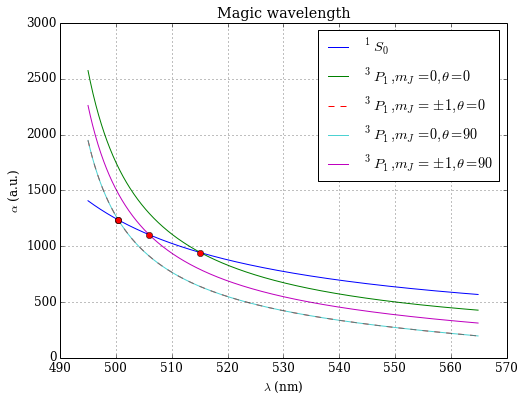

In [93]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange, multiply, add, subtract, argwhere, diff, sign


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

alpha1_s = []
alpha1_v = []
alpha1_t = []
alpha2_s = []
alpha2_v = []
alpha2_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha1 = Alpha_1S0(Omega(_wavelength))
    alpha2 = Alpha_3P1(Omega(_wavelength))
    alpha1_s.append(alpha1[0])
    alpha1_v.append(alpha1[1])
    alpha1_t.append(alpha1[2])
    alpha2_s.append(alpha2[0])
    alpha2_v.append(alpha2[1])
    alpha2_t.append(alpha2[2])

# Core polarizability
t = 5.29
# t = 0

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, add(alpha1_s, t), markersize = 10, label = r'$^1S_0$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_t, (1 - 3) / 2 * (-2)), markersize = 10, label = r'$^3P_1, m_J = 0, \theta = 0$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_t, (1 - 3) / 2 * (3 -2)), markersize = 10, linestyle = '--', label = r'$^3P_1, m_J = \pm 1, \theta = 0$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_t, (1 - 0) / 2 * (-2)), markersize = 10, alpha = 0.7, label = r'$^3P_1, m_J = 0, \theta = 90$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_t, (1 - 0) / 2 * (3 -2)), markersize = 10, label = r'$^3P_1, m_J = \pm 1, \theta = 90$')
idx = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s + multiply(alpha2_t, (1 - 3) / 2 * (-2)))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx], alpha1_s[idx] + t, 'ro')
idx1 = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s +  multiply(alpha2_t, (1 - 3) / 2 * (3 -2)))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx1], alpha1_s[idx1] + t, 'ro')
idx2 = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s + multiply(alpha2_t, (1 - 0) / 2 * (-2)))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx2], alpha1_s[idx2] + t, 'ro')
idx3 = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s + multiply(alpha2_t, (1 - 0) / 2 * (3 -2)))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx3], alpha1_s[idx3] + t, 'ro')
print(wavelength[idx], alpha1_s[idx] + t)
print(wavelength[idx], alpha2_s[idx], alpha2_v[idx], alpha2_t[idx])
print(wavelength[idx1], alpha1_s[idx1] + t)
print(wavelength[idx2], alpha1_s[idx2] + t)
print(wavelength[idx3], alpha1_s[idx3] + t)
# ax1.set_xlim([500,535])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('Magic wavelength')
ax1.grid(1)
# plt.savefig('Magic wavelength (Cooper).svg')

813.4280 nm, 3P0 and 1S0, (Safranova15)

1S0 5.26 (au) core polarizability shift (Safranova13)

3P0 Zhou10

3P1 Cooper16

# Circular polarization

The total light shift will then be (the z-axis is perpendicular to the plane of E-field)

$\Delta E(J, m_J, \omega) = -\alpha^{(0)}(J, \omega) \mid E_0^{(+)} \mid^2 -\alpha^{(1)}(J, \omega)(i \textbf{E}_0^{(-)} \times \textbf{E}_0^{(+)})_z \frac{m_J}{J} - \alpha^{(2)}(J, \omega) \frac{3 \mid E_{0z}^{(+)} \mid^2 - \mid E_0^{(+)} \mid^2}{2} \frac{3 m_J^2 - J(J+1)}{J(2J-1)}$


For a circularly polarized light, the total light shift is

$\Delta E(J, m_J, \omega) = -(\alpha^{(0)}(J, \omega) + \alpha^{(1)}(J, \omega) \frac{m_J}{J} \xi-  \alpha^{(2)}(J, \omega)\frac{3 m_J^2 - J(J+1)}{2J(2J-1)}) \mid E_0^{(+)} \mid^2 $ (Boyd thesis, equation 4.21 is wrong)

For $^3P_1$, this is

$\Delta E(J = 1, m_J, \omega) = -(\alpha^{(0)}(J, \omega) + \alpha^{(1)}(J, \omega) m_J \xi-  \alpha^{(2)}(J, \omega)\frac{3 m_J^2 - 2}{2}) \mid E_0^{(+)} \mid^2 $ (Yamamoto 2016)

where $\xi = \pm 1$ for right/left circurlar polarization

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:44: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:46: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


[ 500.4] 1235.33713645
[ 507.7] 1066.92475301
[ 504.4] 1136.05146129


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:48: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:49: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:50: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


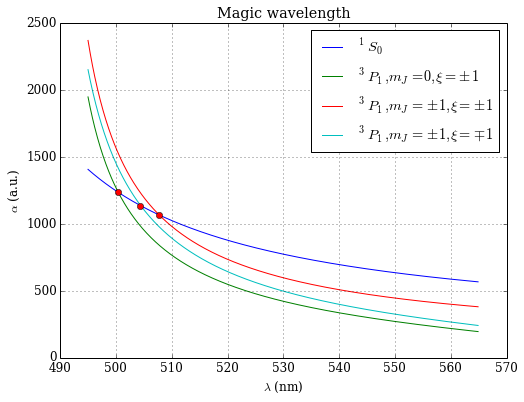

In [60]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange, multiply, add, subtract, argwhere, diff, sign


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

alpha1_s = []
alpha1_v = []
alpha1_t = []
alpha2_s = []
alpha2_v = []
alpha2_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha1 = Alpha_1S0(Omega(_wavelength))
    alpha2 = Alpha_3P1(Omega(_wavelength))
    alpha1_s.append(alpha1[0])
    alpha1_v.append(alpha1[1])
    alpha1_t.append(alpha1[2])
    alpha2_s.append(alpha2[0])
    alpha2_v.append(alpha2[1])
    alpha2_t.append(alpha2[2])

# Core polarizability
t = 5.29
# t = 0

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, add(alpha1_s, t), markersize = 10, label = r'$^1S_0$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_t, 0.5 * (-2)), markersize = 10, label = r'$^3P_1, m_J = 0, \xi = \pm 1$')
ax1.plot(wavelength, alpha2_s + multiply(alpha2_v, 1) - multiply(alpha2_t, 0.5), markersize = 10, label = r'$^3P_1, m_J =  \pm 1, \xi = \pm 1$')
ax1.plot(wavelength, alpha2_s - multiply(alpha2_v, 1) - multiply(alpha2_t, 0.5), markersize = 10, label = r'$^3P_1, m_J = \pm 1, \xi = \mp 1$')
# ax1.set_xlim([500,535])
# ax1.set_xlim([500,535])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('Magic wavelength')
ax1.grid(1)
idx = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s + multiply(alpha2_t, 0.5 * (-2)))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx], alpha1_s[idx] + t, 'ro')
idx1 = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s - multiply(alpha2_v, 1 ) + multiply(alpha2_t, 0.5))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx1], alpha1_s[idx1] + t, 'ro')
idx2 = argwhere(diff(sign(add(alpha1_s, t) - alpha2_s + multiply(alpha2_v, 1 ) + multiply(alpha2_t, 0.5))) != 0).reshape(-1) + 0
ax1.plot(wavelength[idx2], alpha1_s[idx2] + t, 'ro')
print(wavelength[idx], alpha1_s[idx] + t)
print(wavelength[idx1], alpha1_s[idx1] + t)
print(wavelength[idx2], alpha1_s[idx2] + t)
plt.savefig('Magic wavelength (circular, Cooper).svg')

# Polarizability of the 1P1 state

If we assume the $^1P_1$ state (5s5p) only couples to the $^1S_0$ state (from the transition data when we computed the $^1S_0 and ^3P_1$ polarizability). We can only consider this transition and compute the polarizability of the $^1P_1$ state.

In [55]:
# Transition frequency in units of 10^15 Hz
# omega = 2 * pi * f
# Transition rates in units of 10^6 s^-1
# Transition wavelengths in units of nm

f = open ( '1P1' , 'r')
l = []
l = [line.split() for line in f]
initial_state_1P1 = []
final_state_1P1 = []
wavelength_1P1 = []
rate_1P1 = []
for line in l[0:1]:
    #print(line)
    initial_state_1P1.append(line[3])
    final_state_1P1.append(line[5])
    wavelength_1P1.append(float(line[8]))
    rate_1P1.append(float(line[9]))
print(initial_state_1P1)
print(final_state_1P1)
print(wavelength_1P1)
print(rate_1P1)

['1S0']
['1P1']
[460.8618]
[190.0057]


In [66]:
omega_1P1 = []
SLJ_1P1 = []
S1L1J1_1P1 = []
for i, k in enumerate(wavelength_1P1):
    omega_1P1.append(Omega(k))
    SLJ_1P1.append(Compute_SLJ(final_state_1P1[i]))
    S1L1J1_1P1.append(Compute_SLJ(initial_state_1P1[i]))
print(omega_1P1)
print(SLJ_1P1)
print(S1L1J1_1P1)
print(SLJ_1P1[0][2])

[4.087237291477014]
[(0.0, 1, 1.0)]
[(0.0, 0, 0.0)]
1.0


In [89]:
from math import sqrt
def Alpha_1P1(omega):
    scalar = 0
    vector = 0
    tensor = 0
    J = SLJ_1P1[0][2]
    # J = 1, J' = 0
    for i, omega_ik in enumerate(omega_1P1):
        if (omega_ik == omega):
            result = 0
        else:
            ####################################################
            ### SPECIAL CARE HERE, NEED TO BE REALLY CAREFUL ###
            ###        NEED TO CHANGE THE CALCULATION        ###
            ####################################################
            result = -1 * (2 * J + 1) / (2 * J + 1) * rate_1P1[i] * 1E-54 / ((omega_ik)**2 * ((omega_ik)**2 - (omega)**2))
        # result = result * 3 * pi * epsilon_0 * c**3   # SI units
        result = result * 3 / 4 * (c / a_0)**3    # Atomic units
        scalar = scalar + result * 2 / 3
        vector = vector + result * (-1)**(S1L1J1_1P1[i][2] + J + 1) * sqrt((6 * J * (2 * J + 1)) / (J + 1)) * wigner_6j(1, 1, 1, J, J, S1L1J1_1P1[i][2])
        tensor = tensor + result * (-1)**(S1L1J1_1P1[i][2] + J) * sqrt((40 * J * (2 * J + 1) * (2 * J - 1)) / (3 * (J + 1) * (2 * J + 3))) * wigner_6j(1, 1, 2, J, J, S1L1J1_1P1[i][2])
    return (scalar, vector, tensor)

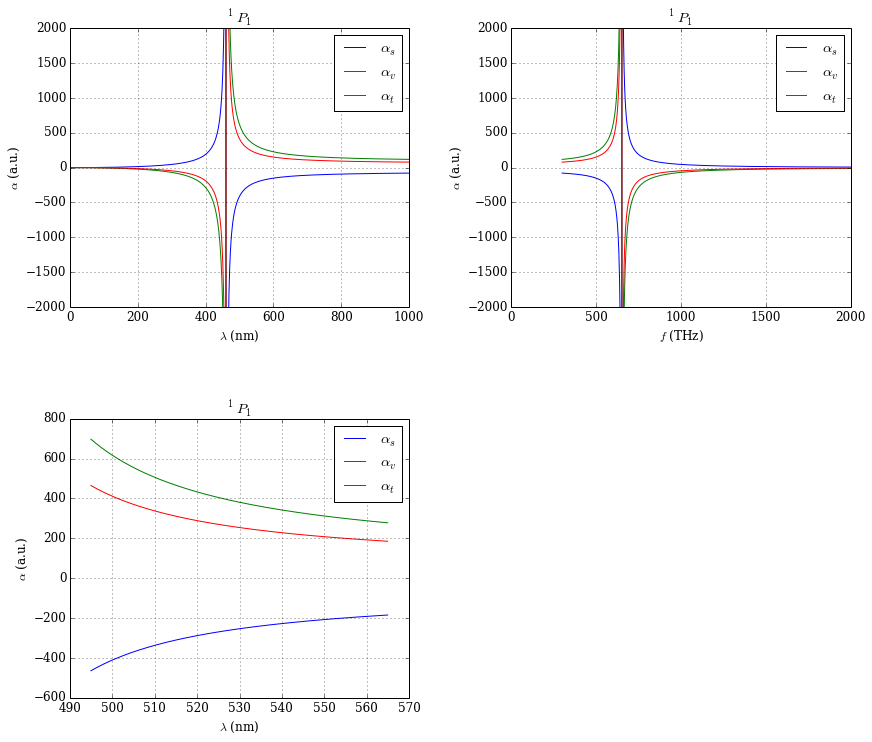

In [94]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange

figure = plt.figure(figsize=(14, 12))
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.3,hspace=0.4)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(1, 1000, 1)
for _wavelength in wavelength:
    alpha = Alpha_1P1(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])
ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax1.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax1.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
ax1.set_ylim([-2000,2000])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title('$^1P_1$')
ax1.grid(1)

ax2 = plt.subplot(gs[0,1]) 
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_s, markersize = 10, label = r'$\alpha_s$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_v, markersize = 10, label = r'$\alpha_v$')
ax2.plot(1000 * Omega(wavelength) / (2 * pi), alpha_t, markersize = 10, label = r'$\alpha_t$')
ax2.set_xlim([0,2000])
ax2.set_ylim([-2000,2000])
ax2.set_xlabel("$f$ (THz)")
ax2.set_ylabel(r"$\alpha$ (a.u.)")
ax2.legend(loc = 1)
ax2.set_title('$^1P_1$')
ax2.grid(1)

alpha_s = []
alpha_v = []
alpha_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha = Alpha_1P1(Omega(_wavelength))
    alpha_s.append(alpha[0])
    alpha_v.append(alpha[1])
    alpha_t.append(alpha[2])

ax3 = plt.subplot(gs[1,0]) 
ax3.plot(wavelength, alpha_s, markersize = 10, label = r'$\alpha_s$')
ax3.plot(wavelength, alpha_v, markersize = 10, label = r'$\alpha_v$')
ax3.plot(wavelength, alpha_t, markersize = 10, label = r'$\alpha_t$')
#ax3.set_xlim([500,535])
ax3.set_xlabel("$\lambda$ (nm)")
ax3.set_ylabel(r"$\alpha$ (a.u.)")
ax3.legend(loc = 1)
ax3.set_title('$^1P_1$')
ax3.grid(1)
plt.savefig('1P1 polarizability.svg')

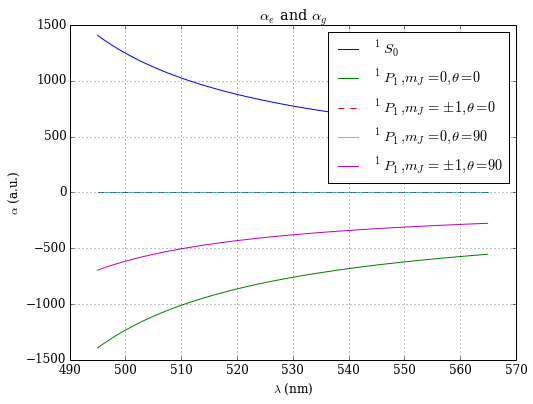

In [91]:
############################
### Linear poalrization ###
############################

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange, multiply, add, subtract, argwhere, diff, sign


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

alpha1_s = []
alpha1_v = []
alpha1_t = []
alpha3_s = []
alpha3_v = []
alpha3_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha1 = Alpha_1S0(Omega(_wavelength))
    alpha3 = Alpha_1P1(Omega(_wavelength))
    alpha1_s.append(alpha1[0])
    alpha1_v.append(alpha1[1])
    alpha1_t.append(alpha1[2])
    alpha3_s.append(alpha3[0])
    alpha3_v.append(alpha3[1])
    alpha3_t.append(alpha3[2])

# Core polarizability
t = 5.29
# t = 0

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, add(alpha1_s, t), markersize = 10, label = r'$^1S_0$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_t, (1 - 3) / 2 * (-2)), markersize = 10, label = r'$^1P_1, m_J = 0, \theta = 0$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_t, (1 - 3) / 2 * (3 -2)), markersize = 10, linestyle = '--', label = r'$^1P_1, m_J = \pm 1, \theta = 0$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_t, (1 - 0) / 2 * (-2)), markersize = 10, alpha = 0.7, label = r'$^1P_1, m_J = 0, \theta = 90$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_t, (1 - 0) / 2 * (3 -2)), markersize = 10, label = r'$^1P_1, m_J = \pm 1, \theta = 90$')
# ax1.set_xlim([500,535])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title(r'$\alpha_e$ and $\alpha_g$')
ax1.grid(1)
# plt.savefig('Magic wavelength (Cooper).svg')

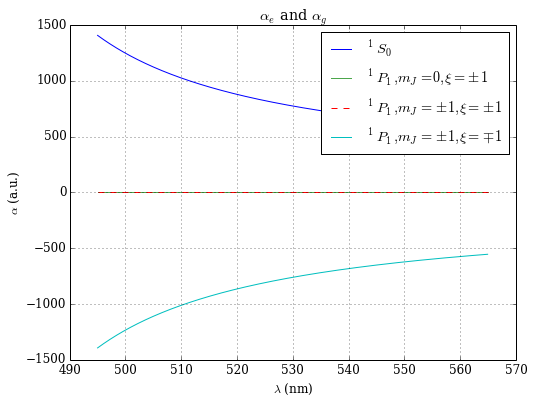

In [92]:
#############################
### Circular poalrization ###
#############################

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from numpy import arange, multiply, add, subtract, argwhere, diff, sign


figure = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 1)
gs.update(wspace=0.3,hspace=0.4)

alpha1_s = []
alpha1_v = []
alpha1_t = []
alpha3_s = []
alpha3_v = []
alpha3_t = []
wavelength = arange(495, 565, 0.1)
for _wavelength in wavelength:
    alpha1 = Alpha_1S0(Omega(_wavelength))
    alpha3 = Alpha_1P1(Omega(_wavelength))
    alpha1_s.append(alpha1[0])
    alpha1_v.append(alpha1[1])
    alpha1_t.append(alpha1[2])
    alpha3_s.append(alpha3[0])
    alpha3_v.append(alpha3[1])
    alpha3_t.append(alpha3[2])

# Core polarizability
t = 5.29
# t = 0

ax1 = plt.subplot(gs[0,0]) 
ax1.plot(wavelength, add(alpha1_s, t), markersize = 10, label = r'$^1S_0$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_t, 0.5 * (-2)), markersize = 10, alpha =0.7, label = r'$^1P_1, m_J = 0, \xi = \pm 1$')
ax1.plot(wavelength, alpha3_s + multiply(alpha3_v, 1) - multiply(alpha3_t, 0.5), linestyle = '--', markersize = 10, label = r'$^1P_1, m_J =  \pm 1, \xi = \pm 1$')
ax1.plot(wavelength, alpha3_s - multiply(alpha3_v, 1) - multiply(alpha3_t, 0.5), markersize = 10, label = r'$^1P_1, m_J = \pm 1, \xi = \mp 1$')
# ax1.set_xlim([500,535])
# ax1.set_xlim([500,535])
ax1.set_xlabel("$\lambda$ (nm)")
ax1.set_ylabel(r"$\alpha$ (a.u.)")
ax1.legend(loc = 1)
ax1.set_title(r'$\alpha_e$ and $\alpha_g$')
ax1.grid(1)
#plt.savefig('Magic wavelength (circular, Cooper).svg')